# Exploring parameters

#### density plots, post predictive checks etc.

In [13]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

#work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

#os.chdir(work_dir)

#from utils.plot import cov, compare_vars, plot_varchanges
#from utils.plot import compare_KLs, plot_KLs
#from sbi.inference import potentials
import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
print(torch.__version__)

1.12.0.dev20220302


In [2]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [8]:
window_len = 30

if num_params == 6:
    
    prior_min_fix = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max_fix = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]

    prior_min = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]
    #true_params = torch.tensor([[26.61, 63.53,  137.12]])
    true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])

    

if num_params == 25:
    prior_min = [0, 0, 0, 0, 0, 0, 0, 0, 13.3,    # prox1 weights
                 0, 0, 0, 0, 0, 0, 51.980,            # distal weights
                 0, 0, 0, 0, 0, 0, 0, 0, 112.13]       # prox2 weights


    # ampa, nmda [0.927, 0.160, 2.093, 0.0519,        1.0, 1.0, 1.0, 1.0, 35.9,
    #           0.0394, 0.000042, 0.039372,           0.854, 0.117,  0.480, 75.08,
    #            0.000018, 8.633, 0.05375, 4.104,     1.0, 1.0, 1.0, 1.0, 162.110]

    prior_max = [0.927, 1.0, 0.160, 1.0,  2.093, 1.0, 0.0519, 1.0, 35.9,
                 0.0394, 0.117, 0.000042, 0.025902, 0.854, 0.480, 75.08,
                 0.000018, 1.0, 8.633, 1.0, 0.05375, 1.0, 4.104,  1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.3739, 0.0399, 0.0, 0.6244, 0.3739, 0.034, 0.0, 18.977,
                                 0.011467, 0.06337, 0.000012, 0.013407, 0.466095, 0.0767, 63.08,
                                 0.000005, 0.116706, 4.6729, 0.016733, 0.011468, 0.061556, 2.33, 0.0679, 120.86]])
    
if num_params == 17:
    
    prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
    prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [9]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [10]:
from utils import inference

import pickle


import os

#work_dir = '/home/ubuntu/'

#os.chdir(work_dir)



import os

print(os.getcwd())



/home/ubuntu/sbi_for_eeg_data/notebooks/results


In [27]:
#file = 'multi_round_10000_17params_threshold'
file = '10000sims_17params_07_04_nsf_fake_ratio'

print(os.getcwd())

os.chdir('/home/ubuntu/results')


print(os.getcwd())
  

#thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))

#neural_dens = torch.load('{}/neural_dens.pt'.format(file))
x_without = torch.load('{}/obs_without.pt'.format(file))

#x = calculate_summary_stats_temporal(x_without)


#true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])
#true_params = torch.tensor([[  18.9700, 63.5300, 137.1200]])
#true_params = torch.load('results/{}/true_params.pt'.format(file))
#true_params = torch.tensor([[0.277, 0.0399, 0.3739, 0.034, 18.977, 0.0115, 0.000012, 0.466, 0.06337, 0.0134, 0.0766, 63.08, 0.000005, 4.6729, 0.0115, 0.3308, 120.86]])

#posteriors_round =  torch.load('{}/posteriors_each_round.pt'.format(file))
obs_real = torch.load('{}/obs_real.pt'.format(file))

/home/ubuntu/results
/home/ubuntu/results


In [51]:
obs_real_stat = posterior.default_x

In [17]:
posterior_threshold = posteriors_round[1]

In [28]:
#obs_real_stat2 = calculate_summary_stats_temporal(obs_real[0])

samples = posterior.sample((1000,))

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

In [19]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

if num_params ==6:
    parameter_names = ["prox_1_ampa_l2_pyr",
     "t_evprox_1",
     "dist_nmda_l2_pyr",
     "t_evdist_1", 
     "prox_2_ampa_l5_pyr",
     "t_evprox_2"]

In [20]:
true_params_threshold = torch.tensor([0.08831, 0.01525, 0.19934, 0, 0, 26.61, 
                                     0.000007, 0.006562, 0.004317, 0.080074, 0.019482, 63.53,
                                     1.43884, 0.684013, 0, 0, 137.12])

In [21]:


true_params_supra = torch.tensor([0.08831, 0.01525,  0.19934, 0, 0, 26.61, 0, 0, 0, 0, 0, 63.53,
                                 1.43884, 0.684013, 0, 0, 137.12])

In [22]:
file = 'multi_round_10000_17params_supra'




thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))

#neural_dens = torch.load('{}/neural_dens.pt'.format(file))
x_without = torch.load('{}/obs_without.pt'.format(file))

#x = calculate_summary_stats_temporal(x_without)


#true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])
#true_params = torch.tensor([[  18.9700, 63.5300, 137.1200]])
#true_params = torch.load('results/{}/true_params.pt'.format(file))
#true_params = torch.tensor([[0.277, 0.0399, 0.3739, 0.034, 18.977, 0.0115, 0.000012, 0.466, 0.06337, 0.0134, 0.0766, 63.08, 0.000005, 4.6729, 0.0115, 0.3308, 120.86]])

posteriors_round_s =  torch.load('{}/posteriors_each_round.pt'.format(file))
obs_real2 = torch.load('{}/obs_real.pt'.format(file))

In [23]:
posterior_s = posteriors_round_s[1]

In [24]:
samples_supra = posterior_s.sample((1000,))

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 1000 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


In [29]:
##better limits:

list_min = torch.min(torch.cat((samples_supra, samples), dim=0), 0)[0]
list_max = torch.max(torch.cat((samples_supra, samples), dim=0), 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.4

print(diff)

list_min = list(list_min - diff)
list_max = list(list_max + diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([-3.3521e-02, -4.5712e-04,  4.5854e-03,  4.8950e-02, -5.7135e-02,
         2.2170e+01, -4.2385e-06, -1.4018e-03,  4.5570e-06,  1.0852e-02,
         5.2900e-05,  5.9383e+01, -3.7580e-02, -3.4908e-02, -5.0279e-03,
        -7.2858e-02,  1.0951e+02])
tensor([8.2657e-01, 2.3025e-01, 2.4905e+00, 9.9949e-01, 1.5760e-02, 2.9434e+01,
        4.1985e-05, 3.9997e-02, 2.5420e-02, 4.8763e-01, 1.1774e-01, 6.6834e+01,
        8.7930e+00, 4.3124e+00, 9.9865e-01, 1.0278e+00, 1.4898e+02])
tensor([3.4404e-01, 9.2284e-02, 9.9437e-01, 3.8021e-01, 2.9158e-02, 2.9056e+00,
        1.8489e-05, 1.6559e-02, 1.0166e-02, 1.9071e-01, 4.7074e-02, 2.9803e+00,
        3.5322e+00, 1.7389e+00, 4.0147e-01, 4.4027e-01, 1.5787e+01])


In [123]:
#limits = [list(tup) for tup in zip(prior_min, prior_max)]

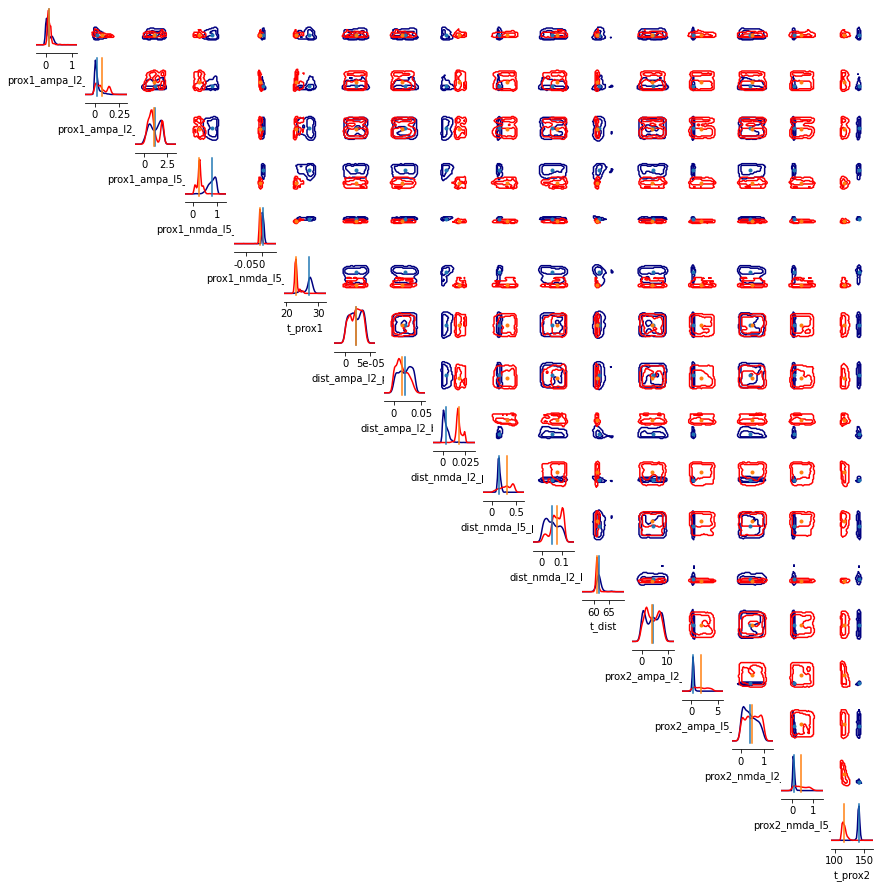

In [30]:
_ = analysis.pairplot(
    samples = [samples_supra, samples],
    points = [torch.mean(samples_supra, axis=0), torch.mean(samples, axis=0)],
    limits = limits,
    #subset: List[int] = None,
    upper = "contour",
    diag = "kde",
    figsize = (15, 15),
    labels= parameter_names,

    #ticks: Union[List, torch.Tensor] = [],
    #points_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"],
    kde_offdiag = {
            "alpha": [0.8, 0.2],
            #"edgecolor": "none",
            #"rasterized": False,
            #'s': mpl.rcParams['lines.markersize'] ** 0.5,
            "bw_method": "scott",
            "bins": 50,
            #'cmap': 'viridis'
        },
    hist_offdiag_alpha = 0.02,
    points_offdiag={"markersize": 6},
    #samples_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"],
    #fig=None,
    #axes=None,
    #**kwargs,
    scatter_offdiag = {
            "alpha": 0.2,
            "edgecolor": "none",
            "rasterized": True,
            's': mpl.rcParams['lines.markersize'] ** 0.5
        },
    contour_offdiag={"levels":  [0.68, 0.95]},
    samples_colors =  ['#000080', '#FF0000'],
)